**TITANIC - PREDICTIONS - IRONHACK**

# Importing libraries

In [69]:
# Data processing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix

# Visualization
import matplotlib.pyplot as plt

# Import data

In [70]:
df = pd.read_csv('./data/train_cleaned_knn_imputation_without_outliers.csv', index_col=0)
titanic = df.copy()

In [71]:
titanic

,Survived,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1.0,22.0,1,0,7.2500,0.0,1.0
1,1,1,0.0,38.0,1,0,71.2833,0.0,0.0
2,1,3,0.0,26.0,0,0,7.9250,0.0,1.0
3,1,1,0.0,35.0,1,0,53.1000,0.0,1.0
4,0,3,1.0,35.0,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,13.0000,0.0,1.0
887,1,1,0.0,19.0,0,0,30.0000,0.0,1.0
888,0,3,0.0,22.0,1,2,23.4500,0.0,1.0
889,1,1,1.0,26.0,0,0,30.0000,0.0,0.0


In [72]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    825 non-null    int64  
 1   Pclass      825 non-null    int64  
 2   Sex_male    825 non-null    float64
 3   Age         825 non-null    float64
 4   SibSp       825 non-null    int64  
 5   Parch       825 non-null    int64  
 6   Fare        825 non-null    float64
 7   Embarked_Q  825 non-null    float64
 8   Embarked_S  825 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 64.5 KB


# Modeling

Since this is traditional binary classification problem we are going to use classification models. There are so many models, that can perform very well on this task, but this time we are going to use 10 most common and well known models.  We are going to compare performance metrics like score for each model and once we identify the best model, we are going to use hyperparameter tuning to further boost the performance of the best model.   
  
The models we are going to use are:  

- Logistic regression  
- Support vector machines  
- K-nearest neighbors  
- Gaussian naive bayes  
- Perceptron  
- Linear SVC  
- Stochastic gradient descent  
- Decision tree  
- Random forest  
- CatBoost  

##  Preprocessing data

### Splitting the data

In [73]:
# defining x and y

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# split into 70 / 30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=156)

### Scaling the data

In [74]:
# defining the scaler

scaler = StandardScaler()  

# training the scaler

scaler.fit(X_train)

# perform transformation

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Making predictions

### Logistic regression

In [75]:
# establishing a model 
log_reg = LogisticRegression()

# train the model 
log_reg.fit(X_train_scaled, y_train)

# make prediction
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

# get score
acc_log_reg_train = accuracy_score(y_train, y_pred_train)
acc_log_reg_test = accuracy_score(y_test, y_pred_test)
log_reg_kappa = cohen_kappa_score(y_train, y_pred_train)

acc_log_reg_train, acc_log_reg_test, log_reg_kappa

(0.8145580589254766, 0.7620967741935484, 0.6087838137542535)

### Support vector machines

In [76]:
# establishing a model 
svc = SVC()

# train the model 
svc.fit(X_train_scaled, y_train)

# make prediction
y_pred_train = svc.predict(X_train_scaled)
y_pred_test = svc.predict(X_test_scaled)

# get score
acc_svc_train = accuracy_score(y_train, y_pred_train)
acc_svc_test = accuracy_score(y_test, y_pred_test)
svc_kappa = cohen_kappa_score(y_train, y_pred_train)

acc_svc_train, acc_svc_test, svc_kappa

(0.854419410745234, 0.7983870967741935, 0.688820976398983)

### K-nearest neighbors

In [77]:
# establishing a model 
knn = KNeighborsClassifier(n_neighbors=5)

# train the model 
knn.fit(X_train_scaled, y_train)

# make prediction
y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)


# get score
acc_knn_train = accuracy_score(y_train, y_pred_train_knn)
acc_knn_test = accuracy_score(y_test,y_pred_test_knn)
knn_kappa = cohen_kappa_score(y_train, y_pred_train_knn)

acc_knn_train, acc_knn_test, knn_kappa

(0.8700173310225303, 0.7540322580645161, 0.728695292369614)

### Gaussian naive bayes

In [78]:
# establishing a model 
gaussian = GaussianNB()

# train the model 
gaussian.fit(X_train_scaled, y_train)

# make prediction
y_pred_train = gaussian.predict(X_train_scaled)
y_pred_test = gaussian.predict(X_test_scaled)

# get score
acc_gaussian_train = accuracy_score(y_train, y_pred_train)
acc_gaussian_test = accuracy_score(y_test, y_pred_test)
gaussian_kappa = cohen_kappa_score(y_train, y_pred_train)

acc_gaussian_train, acc_gaussian_test, gaussian_kappa

(0.7833622183708839, 0.7338709677419355, 0.5457579937146132)

### Perceptron

In [79]:
# establishing a model 
perceptron = Perceptron()

# train the model 
perceptron.fit(X_train_scaled, y_train)

# make prediction
y_pred_train = perceptron.predict(X_train_scaled)
y_pred_test = perceptron.predict(X_test_scaled)


# get score
acc_perceptron_train = accuracy_score(y_train, y_pred_train)
acc_perceptron_test = accuracy_score(y_test, y_pred_test)
p_kappa = cohen_kappa_score(y_train, y_pred_train)

acc_perceptron_train, acc_perceptron_test, p_kappa

(0.7417677642980935, 0.6854838709677419, 0.44327019588797156)

### Linear SVC

In [80]:
# establishing a model 
linear_svc = LinearSVC()

# train the model 
linear_svc.fit(X_train_scaled, y_train)

# make prediction
y_pred_train = linear_svc.predict(X_train_scaled)
y_pred_test = linear_svc.predict(X_test_scaled)


# get score
acc_linear_svc_train = accuracy_score(y_train, y_pred_train)
acc_linear_svc_test = accuracy_score(y_test, y_pred_test)
linear_svc_kappa = cohen_kappa_score(y_train, y_pred_train)

acc_linear_svc_train, acc_linear_svc_test, linear_svc_kappa

(0.8093587521663779, 0.7661290322580645, 0.5975065317200619)

### Stochastic gradient descent

In [81]:
# establishing a model 
sgd = SGDClassifier()

# train the model 
sgd.fit(X_train_scaled, y_train)

# make prediction
y_pred_train = sgd.predict(X_train_scaled)
y_pred_test = sgd.predict(X_test_scaled)

# get score
acc_sgd_train = accuracy_score(y_train, y_pred_train)
acc_sgd_test = accuracy_score(y_test, y_pred_test)
sgd_kappa = cohen_kappa_score(y_train, y_pred_train)

acc_sgd_train, acc_sgd_test, sgd_kappa

(0.7521663778162911, 0.7096774193548387, 0.47715967632577805)

### Decision tree

In [82]:
# establishing a model 
decision_tree = DecisionTreeClassifier()

# train the model 
decision_tree.fit(X_train_scaled, y_train)

# make prediction
y_pred_train = decision_tree.predict(X_train_scaled)
y_pred_test = decision_tree.predict(X_test_scaled)

# get score
acc_decision_tree_train = accuracy_score(y_train, y_pred_train)
acc_decision_tree_test = accuracy_score(y_test, y_pred_test)
dt_kappa = cohen_kappa_score(y_train, y_pred_train)

acc_decision_tree_train, acc_decision_tree_test, dt_kappa

(0.9861351819757366, 0.7701612903225806, 0.9708173174185717)

### Random forest

In [83]:
# establishing a model 
random_forest = RandomForestClassifier()

# train the model 
random_forest.fit(X_train_scaled, y_train)

# make prediction
y_pred_train = random_forest.predict(X_train_scaled)
y_pred_test = random_forest.predict(X_test_scaled)

# get score
acc_random_forest_train = accuracy_score(y_train, y_pred_train)
acc_random_forest_test = accuracy_score(y_test, y_pred_test)
rf_kappa = cohen_kappa_score(y_train, y_pred_train)

acc_random_forest_train, acc_random_forest_test, rf_kappa

(0.9861351819757366, 0.7782258064516129, 0.9709506488275793)

### CatBoost

In [84]:
# establishing a model 
catboost = CatBoostClassifier()

# train the model 
catboost.fit(X_train_scaled, y_train)

# make prediction
y_pred_train_catboost = catboost.predict(X_train_scaled)
y_pred_test_catboost = catboost.predict(X_test_scaled)

# get score
acc_catboost_train = accuracy_score(y_train, y_pred_train_catboost)
acc_catboost_test = accuracy_score(y_test, y_pred_test_catboost)
catboost_kappa = cohen_kappa_score(y_train, y_pred_train_catboost)

acc_catboost_train, acc_catboost_test, catboost_kappa

Learning rate set to 0.008146
0:	learn: 0.6877333	total: 2.59ms	remaining: 2.58s
1:	learn: 0.6822041	total: 4.74ms	remaining: 2.36s
2:	learn: 0.6771627	total: 7.03ms	remaining: 2.34s
3:	learn: 0.6719147	total: 10.2ms	remaining: 2.55s
4:	learn: 0.6670557	total: 12.3ms	remaining: 2.45s
5:	learn: 0.6623633	total: 15.2ms	remaining: 2.52s
6:	learn: 0.6574019	total: 18.2ms	remaining: 2.58s
7:	learn: 0.6534231	total: 19.9ms	remaining: 2.47s
8:	learn: 0.6485163	total: 23ms	remaining: 2.54s
9:	learn: 0.6438706	total: 26.5ms	remaining: 2.62s
10:	learn: 0.6390681	total: 29ms	remaining: 2.61s
11:	learn: 0.6347548	total: 31.2ms	remaining: 2.57s
12:	learn: 0.6308232	total: 33.3ms	remaining: 2.53s
13:	learn: 0.6258778	total: 36.6ms	remaining: 2.58s
14:	learn: 0.6210282	total: 39.4ms	remaining: 2.59s
15:	learn: 0.6168888	total: 41.7ms	remaining: 2.56s
16:	learn: 0.6126911	total: 43.8ms	remaining: 2.53s
17:	learn: 0.6080564	total: 46ms	remaining: 2.51s
18:	learn: 0.6043013	total: 48.9ms	remaining: 2.52

219:	learn: 0.3673190	total: 474ms	remaining: 1.68s
220:	learn: 0.3667115	total: 480ms	remaining: 1.69s
221:	learn: 0.3663165	total: 482ms	remaining: 1.69s
222:	learn: 0.3658419	total: 485ms	remaining: 1.69s
223:	learn: 0.3653744	total: 488ms	remaining: 1.69s
224:	learn: 0.3650622	total: 491ms	remaining: 1.69s
225:	learn: 0.3646276	total: 493ms	remaining: 1.69s
226:	learn: 0.3640874	total: 496ms	remaining: 1.69s
227:	learn: 0.3636990	total: 498ms	remaining: 1.69s
228:	learn: 0.3630584	total: 501ms	remaining: 1.69s
229:	learn: 0.3627125	total: 505ms	remaining: 1.69s
230:	learn: 0.3623023	total: 508ms	remaining: 1.69s
231:	learn: 0.3621422	total: 511ms	remaining: 1.69s
232:	learn: 0.3616731	total: 514ms	remaining: 1.69s
233:	learn: 0.3612593	total: 517ms	remaining: 1.69s
234:	learn: 0.3607631	total: 520ms	remaining: 1.69s
235:	learn: 0.3602939	total: 523ms	remaining: 1.69s
236:	learn: 0.3598615	total: 526ms	remaining: 1.69s
237:	learn: 0.3595628	total: 528ms	remaining: 1.69s
238:	learn: 

422:	learn: 0.3168613	total: 947ms	remaining: 1.29s
423:	learn: 0.3168255	total: 949ms	remaining: 1.29s
424:	learn: 0.3167833	total: 951ms	remaining: 1.29s
425:	learn: 0.3166969	total: 953ms	remaining: 1.28s
426:	learn: 0.3166013	total: 955ms	remaining: 1.28s
427:	learn: 0.3165345	total: 957ms	remaining: 1.28s
428:	learn: 0.3161214	total: 959ms	remaining: 1.28s
429:	learn: 0.3160272	total: 961ms	remaining: 1.27s
430:	learn: 0.3159508	total: 963ms	remaining: 1.27s
431:	learn: 0.3158737	total: 965ms	remaining: 1.27s
432:	learn: 0.3156062	total: 968ms	remaining: 1.27s
433:	learn: 0.3153218	total: 971ms	remaining: 1.27s
434:	learn: 0.3151990	total: 973ms	remaining: 1.26s
435:	learn: 0.3149292	total: 975ms	remaining: 1.26s
436:	learn: 0.3146549	total: 977ms	remaining: 1.26s
437:	learn: 0.3144288	total: 979ms	remaining: 1.26s
438:	learn: 0.3142865	total: 981ms	remaining: 1.25s
439:	learn: 0.3142081	total: 982ms	remaining: 1.25s
440:	learn: 0.3140287	total: 985ms	remaining: 1.25s
441:	learn: 

597:	learn: 0.2905336	total: 1.27s	remaining: 858ms
598:	learn: 0.2905034	total: 1.28s	remaining: 855ms
599:	learn: 0.2903822	total: 1.28s	remaining: 853ms
600:	learn: 0.2902401	total: 1.28s	remaining: 851ms
601:	learn: 0.2901231	total: 1.28s	remaining: 848ms
602:	learn: 0.2900235	total: 1.28s	remaining: 846ms
603:	learn: 0.2899662	total: 1.29s	remaining: 844ms
604:	learn: 0.2896375	total: 1.29s	remaining: 841ms
605:	learn: 0.2894147	total: 1.29s	remaining: 839ms
606:	learn: 0.2891756	total: 1.29s	remaining: 837ms
607:	learn: 0.2890923	total: 1.29s	remaining: 835ms
608:	learn: 0.2890541	total: 1.3s	remaining: 832ms
609:	learn: 0.2888764	total: 1.3s	remaining: 830ms
610:	learn: 0.2887297	total: 1.3s	remaining: 828ms
611:	learn: 0.2886106	total: 1.3s	remaining: 826ms
612:	learn: 0.2885228	total: 1.3s	remaining: 824ms
613:	learn: 0.2883057	total: 1.31s	remaining: 822ms
614:	learn: 0.2882271	total: 1.31s	remaining: 819ms
615:	learn: 0.2882261	total: 1.31s	remaining: 817ms
616:	learn: 0.288

824:	learn: 0.2602515	total: 1.75s	remaining: 372ms
825:	learn: 0.2601301	total: 1.76s	remaining: 370ms
826:	learn: 0.2600066	total: 1.76s	remaining: 368ms
827:	learn: 0.2599125	total: 1.76s	remaining: 366ms
828:	learn: 0.2597955	total: 1.76s	remaining: 364ms
829:	learn: 0.2596766	total: 1.76s	remaining: 362ms
830:	learn: 0.2595693	total: 1.77s	remaining: 360ms
831:	learn: 0.2595424	total: 1.77s	remaining: 358ms
832:	learn: 0.2594123	total: 1.77s	remaining: 355ms
833:	learn: 0.2593228	total: 1.77s	remaining: 353ms
834:	learn: 0.2590523	total: 1.78s	remaining: 351ms
835:	learn: 0.2588821	total: 1.78s	remaining: 349ms
836:	learn: 0.2587100	total: 1.78s	remaining: 347ms
837:	learn: 0.2585817	total: 1.78s	remaining: 345ms
838:	learn: 0.2585098	total: 1.78s	remaining: 343ms
839:	learn: 0.2584127	total: 1.79s	remaining: 340ms
840:	learn: 0.2582403	total: 1.79s	remaining: 338ms
841:	learn: 0.2579701	total: 1.79s	remaining: 336ms
842:	learn: 0.2578124	total: 1.79s	remaining: 334ms
843:	learn: 

(0.9168110918544194, 0.8225806451612904, 0.8230083971319385)

## Model evaluation and hyperparameter tuning 

The idea is to assess the performance of these models and then select one which has the highest prediction accuracy

### Training accuracy

In [85]:
# initialize dataframe with performance metrics for each model
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       
                       'Train Accuracy score': [acc_svc_train, acc_knn_train, acc_log_reg_train, acc_random_forest_train,
                                       acc_gaussian_train, acc_perceptron_train, acc_sgd_train, acc_linear_svc_train,
                                       acc_decision_tree_train, acc_catboost_train],
                       
                      'Test Accuracy score': [acc_svc_test, acc_knn_test, acc_log_reg_test, acc_random_forest_test,
                                     acc_gaussian_test, acc_perceptron_test, acc_sgd_test, acc_linear_svc_test,
                                     acc_decision_tree_test, acc_catboost_test],
                       
                      'Kappa score': [svc_kappa, knn_kappa, log_reg_kappa, rf_kappa, gaussian_kappa,
                                      p_kappa, sgd_kappa, linear_svc_kappa, dt_kappa, catboost_kappa]})


# sort data frame from highest to lowest train score

models.sort_values(by='Train Accuracy score', ascending=False, ignore_index=True)

,Model,Train Accuracy score,Test Accuracy score,Kappa score
0,Random Forest,0.986135,0.778226,0.970951
1,Decision Tree,0.986135,0.770161,0.970817
2,CatBoost,0.916811,0.822581,0.823008
3,KNN,0.870017,0.754032,0.728695
4,Support Vector Machines,0.854419,0.798387,0.688821
5,Logistic Regression,0.814558,0.762097,0.608784
6,Linear SVC,0.809359,0.766129,0.597507
7,Naive Bayes,0.783362,0.733871,0.545758
8,Stochastic Gradient Decent,0.752166,0.709677,0.477160
9,Perceptron,0.741768,0.685484,0.443270


**Which model has the best performance?**  
What is the difference between train and test score?

In [86]:
# compute absolute difference between train and test 
absolute_difference_train_test = abs(models['Train Accuracy score'] - models['Test Accuracy score'])


# add  absolute difference in our models dataframe
models['Train / Test AD'] = absolute_difference_train_test

In [87]:
# round the number to the second number

m = models[['Train Accuracy score', 'Test Accuracy score', 'Kappa score', 'Train / Test AD']].apply(lambda x: round(x,2))
models =  pd.concat([models[['Model']],m],axis=1)

In [88]:
# sort by lowest absolute difference
models.sort_values(by='Train / Test AD', ignore_index=True)

,Model,Train Accuracy score,Test Accuracy score,Kappa score,Train / Test AD
0,Stochastic Gradient Decent,0.75,0.71,0.48,0.04
1,Linear SVC,0.81,0.77,0.60,0.04
2,Logistic Regression,0.81,0.76,0.61,0.05
3,Naive Bayes,0.78,0.73,0.55,0.05
4,Support Vector Machines,0.85,0.80,0.69,0.06
5,Perceptron,0.74,0.69,0.44,0.06
6,CatBoost,0.92,0.82,0.82,0.09
7,KNN,0.87,0.75,0.73,0.12
8,Random Forest,0.99,0.78,0.97,0.21
9,Decision Tree,0.99,0.77,0.97,0.22


Highest kappa score?

In [89]:
models.sort_values(by='Kappa score', ascending=False, ignore_index=True)

,Model,Train Accuracy score,Test Accuracy score,Kappa score,Train / Test AD
0,Random Forest,0.99,0.78,0.97,0.21
1,Decision Tree,0.99,0.77,0.97,0.22
2,CatBoost,0.92,0.82,0.82,0.09
3,KNN,0.87,0.75,0.73,0.12
4,Support Vector Machines,0.85,0.80,0.69,0.06
5,Logistic Regression,0.81,0.76,0.61,0.05
6,Linear SVC,0.81,0.77,0.60,0.04
7,Naive Bayes,0.78,0.73,0.55,0.05
8,Stochastic Gradient Decent,0.75,0.71,0.48,0.04
9,Perceptron,0.74,0.69,0.44,0.06


In [102]:
models.to_csv('./data/models_score.csv')

In [103]:
models

,Model,Train Accuracy score,Test Accuracy score,Kappa score,Train / Test AD
0,Support Vector Machines,0.85,0.80,0.69,0.06
1,KNN,0.87,0.75,0.73,0.12
2,Logistic Regression,0.81,0.76,0.61,0.05
3,Random Forest,0.99,0.78,0.97,0.21
4,Naive Bayes,0.78,0.73,0.55,0.05
5,Perceptron,0.74,0.69,0.44,0.06
6,Stochastic Gradient Decent,0.75,0.71,0.48,0.04
7,Linear SVC,0.81,0.77,0.60,0.04
8,Decision Tree,0.99,0.77,0.97,0.22
9,CatBoost,0.92,0.82,0.82,0.09


### Compare y and y_predicted for train and test 

Based on two highest kappa score (excluding random forest and decision tree, due to very high difference in train and test)

#### Train

In [90]:
compare_models_train = pd.DataFrame({'Y Real': y_train,
                                     'CatBoost': y_pred_train_catboost,
                                     'KNN': y_pred_train_knn})

compare_models_train

,Y Real,CatBoost,KNN
396,0,0,0
260,0,0,0
375,1,1,1
357,0,1,1
538,0,0,0
...,...,...,...
616,0,0,0
520,1,1,1
452,0,0,1
770,0,0,0


In [120]:
compare_models_train[compare_models_train['CatBoost'] != compare_models_train['KNN']]

,Y Real,CatBoost,KNN
254,0,0,1
799,0,0,1
449,1,0,1
807,0,1,0
53,1,1,0
139,0,0,1
888,0,0,1
235,0,0,1
489,1,1,0
578,0,0,1


#### Test

In [92]:
compare_models_test = pd.DataFrame({'Y Real': y_test,
                                     'CatBoost': y_pred_test_catboost,
                                     'KNN': y_pred_test_knn})

compare_models_test

,Y Real,CatBoost,KNN
120,0,0,0
42,0,0,0
843,0,0,0
331,0,1,1
348,1,1,0
...,...,...,...
559,1,0,0
328,1,0,1
623,0,0,0
226,1,0,0


In [122]:
compare_models_test[compare_models_test['CatBoost'] != compare_models_test['KNN']]

,Y Real,CatBoost,KNN
348,1,1,0
125,1,1,0
432,1,1,0
583,0,0,1
423,0,0,1
332,0,0,1
854,0,1,0
426,1,1,0
519,0,0,1
665,0,0,1


## Combining two models

In [129]:
# Define estimators
estimators = [('knn', knn),
              ('CatBoost', catboost)]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimators)

# Train stacked model
stack_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train_scaled)
y_test_pred = stack_model.predict(X_test_scaled)

# Stack model performance

acc_stack_model_train = accuracy_score(y_train, y_train_pred)
acc_stack_model_test = accuracy_score(y_test, y_test_pred)
stack_model_kappa = cohen_kappa_score(y_train, y_train_pred)



Learning rate set to 0.008146
0:	learn: 0.6877333	total: 2.05ms	remaining: 2.05s
1:	learn: 0.6822041	total: 4.1ms	remaining: 2.05s
2:	learn: 0.6771627	total: 6.46ms	remaining: 2.15s
3:	learn: 0.6719147	total: 8.36ms	remaining: 2.08s
4:	learn: 0.6670557	total: 10.3ms	remaining: 2.04s
5:	learn: 0.6623633	total: 12.6ms	remaining: 2.09s
6:	learn: 0.6574019	total: 14.8ms	remaining: 2.1s
7:	learn: 0.6534231	total: 16.3ms	remaining: 2.03s
8:	learn: 0.6485163	total: 18.2ms	remaining: 2.01s
9:	learn: 0.6438706	total: 20.5ms	remaining: 2.03s
10:	learn: 0.6390681	total: 22.5ms	remaining: 2.02s
11:	learn: 0.6347548	total: 24.6ms	remaining: 2.02s
12:	learn: 0.6308232	total: 27ms	remaining: 2.05s
13:	learn: 0.6258778	total: 28.9ms	remaining: 2.04s
14:	learn: 0.6210282	total: 31.3ms	remaining: 2.05s
15:	learn: 0.6168888	total: 33.4ms	remaining: 2.05s
16:	learn: 0.6126911	total: 36.6ms	remaining: 2.12s
17:	learn: 0.6080564	total: 39ms	remaining: 2.13s
18:	learn: 0.6043013	total: 41ms	remaining: 2.12s


167:	learn: 0.3901543	total: 318ms	remaining: 1.57s
168:	learn: 0.3895700	total: 320ms	remaining: 1.57s
169:	learn: 0.3888826	total: 322ms	remaining: 1.57s
170:	learn: 0.3883987	total: 324ms	remaining: 1.57s
171:	learn: 0.3878864	total: 326ms	remaining: 1.57s
172:	learn: 0.3872519	total: 328ms	remaining: 1.57s
173:	learn: 0.3869715	total: 330ms	remaining: 1.57s
174:	learn: 0.3865150	total: 332ms	remaining: 1.56s
175:	learn: 0.3859632	total: 334ms	remaining: 1.56s
176:	learn: 0.3851454	total: 336ms	remaining: 1.56s
177:	learn: 0.3847965	total: 338ms	remaining: 1.56s
178:	learn: 0.3840932	total: 340ms	remaining: 1.56s
179:	learn: 0.3839539	total: 342ms	remaining: 1.56s
180:	learn: 0.3831473	total: 345ms	remaining: 1.56s
181:	learn: 0.3828313	total: 347ms	remaining: 1.56s
182:	learn: 0.3821552	total: 349ms	remaining: 1.56s
183:	learn: 0.3816462	total: 351ms	remaining: 1.55s
184:	learn: 0.3812856	total: 353ms	remaining: 1.55s
185:	learn: 0.3808097	total: 355ms	remaining: 1.55s
186:	learn: 

350:	learn: 0.3312039	total: 649ms	remaining: 1.2s
351:	learn: 0.3310110	total: 652ms	remaining: 1.2s
352:	learn: 0.3308089	total: 654ms	remaining: 1.2s
353:	learn: 0.3304897	total: 656ms	remaining: 1.2s
354:	learn: 0.3302738	total: 658ms	remaining: 1.2s
355:	learn: 0.3301160	total: 660ms	remaining: 1.19s
356:	learn: 0.3297341	total: 661ms	remaining: 1.19s
357:	learn: 0.3295463	total: 664ms	remaining: 1.19s
358:	learn: 0.3293468	total: 666ms	remaining: 1.19s
359:	learn: 0.3292510	total: 668ms	remaining: 1.19s
360:	learn: 0.3291258	total: 670ms	remaining: 1.19s
361:	learn: 0.3290633	total: 672ms	remaining: 1.18s
362:	learn: 0.3289078	total: 674ms	remaining: 1.18s
363:	learn: 0.3286790	total: 676ms	remaining: 1.18s
364:	learn: 0.3285596	total: 679ms	remaining: 1.18s
365:	learn: 0.3282524	total: 681ms	remaining: 1.18s
366:	learn: 0.3281351	total: 684ms	remaining: 1.18s
367:	learn: 0.3279057	total: 686ms	remaining: 1.18s
368:	learn: 0.3275885	total: 688ms	remaining: 1.18s
369:	learn: 0.327

511:	learn: 0.3025607	total: 980ms	remaining: 934ms
512:	learn: 0.3024298	total: 982ms	remaining: 932ms
513:	learn: 0.3022145	total: 985ms	remaining: 931ms
514:	learn: 0.3020821	total: 988ms	remaining: 930ms
515:	learn: 0.3018540	total: 990ms	remaining: 929ms
516:	learn: 0.3017783	total: 1.02s	remaining: 953ms
517:	learn: 0.3016691	total: 1.02s	remaining: 953ms
518:	learn: 0.3015808	total: 1.03s	remaining: 951ms
519:	learn: 0.3013411	total: 1.03s	remaining: 949ms
520:	learn: 0.3013281	total: 1.03s	remaining: 947ms
521:	learn: 0.3011159	total: 1.03s	remaining: 945ms
522:	learn: 0.3008761	total: 1.03s	remaining: 944ms
523:	learn: 0.3006888	total: 1.04s	remaining: 943ms
524:	learn: 0.3006564	total: 1.04s	remaining: 943ms
525:	learn: 0.3003445	total: 1.04s	remaining: 941ms
526:	learn: 0.3002870	total: 1.05s	remaining: 940ms
527:	learn: 0.3001248	total: 1.05s	remaining: 937ms
528:	learn: 0.2999382	total: 1.05s	remaining: 935ms
529:	learn: 0.2997512	total: 1.05s	remaining: 933ms
530:	learn: 

751:	learn: 0.2700187	total: 1.47s	remaining: 486ms
752:	learn: 0.2699132	total: 1.48s	remaining: 485ms
753:	learn: 0.2698367	total: 1.48s	remaining: 483ms
754:	learn: 0.2697111	total: 1.48s	remaining: 481ms
755:	learn: 0.2696093	total: 1.49s	remaining: 479ms
756:	learn: 0.2695745	total: 1.49s	remaining: 478ms
757:	learn: 0.2694683	total: 1.49s	remaining: 476ms
758:	learn: 0.2692565	total: 1.49s	remaining: 474ms
759:	learn: 0.2689969	total: 1.49s	remaining: 472ms
760:	learn: 0.2689265	total: 1.5s	remaining: 470ms
761:	learn: 0.2688315	total: 1.5s	remaining: 468ms
762:	learn: 0.2686035	total: 1.5s	remaining: 466ms
763:	learn: 0.2684335	total: 1.5s	remaining: 465ms
764:	learn: 0.2681002	total: 1.51s	remaining: 463ms
765:	learn: 0.2678906	total: 1.51s	remaining: 461ms
766:	learn: 0.2677933	total: 1.51s	remaining: 460ms
767:	learn: 0.2675256	total: 1.51s	remaining: 458ms
768:	learn: 0.2672489	total: 1.52s	remaining: 456ms
769:	learn: 0.2671135	total: 1.52s	remaining: 454ms
770:	learn: 0.26

979:	learn: 0.2404942	total: 1.96s	remaining: 39.9ms
980:	learn: 0.2403758	total: 1.96s	remaining: 38ms
981:	learn: 0.2402584	total: 1.96s	remaining: 36ms
982:	learn: 0.2401344	total: 1.96s	remaining: 34ms
983:	learn: 0.2400290	total: 1.97s	remaining: 32ms
984:	learn: 0.2399967	total: 1.97s	remaining: 30ms
985:	learn: 0.2398984	total: 1.97s	remaining: 28ms
986:	learn: 0.2397710	total: 1.97s	remaining: 26ms
987:	learn: 0.2396571	total: 1.97s	remaining: 24ms
988:	learn: 0.2394521	total: 1.98s	remaining: 22ms
989:	learn: 0.2392969	total: 1.98s	remaining: 20ms
990:	learn: 0.2390962	total: 1.98s	remaining: 18ms
991:	learn: 0.2390258	total: 1.98s	remaining: 16ms
992:	learn: 0.2389473	total: 1.99s	remaining: 14ms
993:	learn: 0.2389224	total: 1.99s	remaining: 12ms
994:	learn: 0.2388783	total: 1.99s	remaining: 10ms
995:	learn: 0.2387204	total: 1.99s	remaining: 8.01ms
996:	learn: 0.2386586	total: 2s	remaining: 6.01ms
997:	learn: 0.2384953	total: 2s	remaining: 4ms
998:	learn: 0.2384247	total: 2s	

211:	learn: 0.3666113	total: 388ms	remaining: 1.44s
212:	learn: 0.3662774	total: 390ms	remaining: 1.44s
213:	learn: 0.3659550	total: 392ms	remaining: 1.44s
214:	learn: 0.3656913	total: 393ms	remaining: 1.44s
215:	learn: 0.3652757	total: 395ms	remaining: 1.43s
216:	learn: 0.3649046	total: 397ms	remaining: 1.43s
217:	learn: 0.3647028	total: 398ms	remaining: 1.43s
218:	learn: 0.3644274	total: 400ms	remaining: 1.43s
219:	learn: 0.3640878	total: 402ms	remaining: 1.43s
220:	learn: 0.3639629	total: 404ms	remaining: 1.42s
221:	learn: 0.3636008	total: 405ms	remaining: 1.42s
222:	learn: 0.3631026	total: 407ms	remaining: 1.42s
223:	learn: 0.3628097	total: 409ms	remaining: 1.42s
224:	learn: 0.3625086	total: 411ms	remaining: 1.42s
225:	learn: 0.3621434	total: 413ms	remaining: 1.41s
226:	learn: 0.3619557	total: 415ms	remaining: 1.41s
227:	learn: 0.3613198	total: 417ms	remaining: 1.41s
228:	learn: 0.3610354	total: 419ms	remaining: 1.41s
229:	learn: 0.3606854	total: 422ms	remaining: 1.41s
230:	learn: 

385:	learn: 0.3178444	total: 713ms	remaining: 1.13s
386:	learn: 0.3175994	total: 715ms	remaining: 1.13s
387:	learn: 0.3173988	total: 717ms	remaining: 1.13s
388:	learn: 0.3172775	total: 719ms	remaining: 1.13s
389:	learn: 0.3171758	total: 722ms	remaining: 1.13s
390:	learn: 0.3169734	total: 724ms	remaining: 1.13s
391:	learn: 0.3168649	total: 725ms	remaining: 1.13s
392:	learn: 0.3166825	total: 728ms	remaining: 1.12s
393:	learn: 0.3163909	total: 730ms	remaining: 1.12s
394:	learn: 0.3161500	total: 732ms	remaining: 1.12s
395:	learn: 0.3160047	total: 735ms	remaining: 1.12s
396:	learn: 0.3157971	total: 737ms	remaining: 1.12s
397:	learn: 0.3156944	total: 739ms	remaining: 1.12s
398:	learn: 0.3154945	total: 741ms	remaining: 1.11s
399:	learn: 0.3152035	total: 743ms	remaining: 1.11s
400:	learn: 0.3149322	total: 745ms	remaining: 1.11s
401:	learn: 0.3145747	total: 747ms	remaining: 1.11s
402:	learn: 0.3145624	total: 748ms	remaining: 1.11s
403:	learn: 0.3144623	total: 750ms	remaining: 1.11s
404:	learn: 

566:	learn: 0.2876087	total: 1.04s	remaining: 794ms
567:	learn: 0.2875316	total: 1.04s	remaining: 792ms
568:	learn: 0.2873594	total: 1.04s	remaining: 791ms
569:	learn: 0.2871028	total: 1.04s	remaining: 789ms
570:	learn: 0.2870252	total: 1.05s	remaining: 787ms
571:	learn: 0.2869279	total: 1.05s	remaining: 785ms
572:	learn: 0.2868778	total: 1.05s	remaining: 783ms
573:	learn: 0.2866184	total: 1.05s	remaining: 782ms
574:	learn: 0.2863293	total: 1.05s	remaining: 780ms
575:	learn: 0.2860121	total: 1.06s	remaining: 778ms
576:	learn: 0.2859088	total: 1.06s	remaining: 776ms
577:	learn: 0.2857563	total: 1.06s	remaining: 774ms
578:	learn: 0.2857221	total: 1.06s	remaining: 772ms
579:	learn: 0.2855303	total: 1.06s	remaining: 770ms
580:	learn: 0.2854956	total: 1.06s	remaining: 769ms
581:	learn: 0.2852311	total: 1.07s	remaining: 767ms
582:	learn: 0.2850051	total: 1.07s	remaining: 765ms
583:	learn: 0.2846552	total: 1.07s	remaining: 763ms
584:	learn: 0.2846302	total: 1.07s	remaining: 761ms
585:	learn: 

747:	learn: 0.2629511	total: 1.36s	remaining: 459ms
748:	learn: 0.2628165	total: 1.36s	remaining: 458ms
749:	learn: 0.2627627	total: 1.37s	remaining: 456ms
750:	learn: 0.2627249	total: 1.37s	remaining: 454ms
751:	learn: 0.2626660	total: 1.37s	remaining: 453ms
752:	learn: 0.2624087	total: 1.37s	remaining: 451ms
753:	learn: 0.2623117	total: 1.38s	remaining: 449ms
754:	learn: 0.2621929	total: 1.38s	remaining: 447ms
755:	learn: 0.2621181	total: 1.38s	remaining: 445ms
756:	learn: 0.2619911	total: 1.38s	remaining: 444ms
757:	learn: 0.2617892	total: 1.38s	remaining: 442ms
758:	learn: 0.2617304	total: 1.39s	remaining: 441ms
759:	learn: 0.2616905	total: 1.39s	remaining: 439ms
760:	learn: 0.2614689	total: 1.39s	remaining: 437ms
761:	learn: 0.2612972	total: 1.39s	remaining: 435ms
762:	learn: 0.2612654	total: 1.4s	remaining: 434ms
763:	learn: 0.2610584	total: 1.4s	remaining: 432ms
764:	learn: 0.2608392	total: 1.4s	remaining: 430ms
765:	learn: 0.2606916	total: 1.4s	remaining: 429ms
766:	learn: 0.26

917:	learn: 0.2394133	total: 1.69s	remaining: 151ms
918:	learn: 0.2393275	total: 1.69s	remaining: 149ms
919:	learn: 0.2389771	total: 1.69s	remaining: 147ms
920:	learn: 0.2388481	total: 1.7s	remaining: 145ms
921:	learn: 0.2387928	total: 1.7s	remaining: 144ms
922:	learn: 0.2387485	total: 1.7s	remaining: 142ms
923:	learn: 0.2385882	total: 1.7s	remaining: 140ms
924:	learn: 0.2384989	total: 1.7s	remaining: 138ms
925:	learn: 0.2383795	total: 1.71s	remaining: 136ms
926:	learn: 0.2382725	total: 1.71s	remaining: 135ms
927:	learn: 0.2382299	total: 1.71s	remaining: 133ms
928:	learn: 0.2381200	total: 1.71s	remaining: 131ms
929:	learn: 0.2380943	total: 1.72s	remaining: 129ms
930:	learn: 0.2380137	total: 1.72s	remaining: 127ms
931:	learn: 0.2377919	total: 1.72s	remaining: 126ms
932:	learn: 0.2376299	total: 1.72s	remaining: 124ms
933:	learn: 0.2375303	total: 1.72s	remaining: 122ms
934:	learn: 0.2373800	total: 1.73s	remaining: 120ms
935:	learn: 0.2372447	total: 1.73s	remaining: 118ms
936:	learn: 0.237

91:	learn: 0.4496368	total: 163ms	remaining: 1.61s
92:	learn: 0.4481577	total: 165ms	remaining: 1.61s
93:	learn: 0.4467364	total: 168ms	remaining: 1.62s
94:	learn: 0.4452712	total: 170ms	remaining: 1.61s
95:	learn: 0.4439051	total: 171ms	remaining: 1.61s
96:	learn: 0.4425514	total: 173ms	remaining: 1.61s
97:	learn: 0.4412232	total: 175ms	remaining: 1.61s
98:	learn: 0.4403204	total: 177ms	remaining: 1.61s
99:	learn: 0.4389056	total: 179ms	remaining: 1.61s
100:	learn: 0.4381506	total: 181ms	remaining: 1.61s
101:	learn: 0.4375048	total: 183ms	remaining: 1.61s
102:	learn: 0.4363130	total: 185ms	remaining: 1.61s
103:	learn: 0.4348506	total: 188ms	remaining: 1.62s
104:	learn: 0.4337140	total: 190ms	remaining: 1.62s
105:	learn: 0.4324564	total: 191ms	remaining: 1.61s
106:	learn: 0.4312892	total: 193ms	remaining: 1.61s
107:	learn: 0.4300885	total: 195ms	remaining: 1.61s
108:	learn: 0.4288483	total: 197ms	remaining: 1.61s
109:	learn: 0.4277625	total: 199ms	remaining: 1.61s
110:	learn: 0.4266968

266:	learn: 0.3436814	total: 488ms	remaining: 1.34s
267:	learn: 0.3432125	total: 490ms	remaining: 1.34s
268:	learn: 0.3429059	total: 493ms	remaining: 1.34s
269:	learn: 0.3427865	total: 494ms	remaining: 1.34s
270:	learn: 0.3424746	total: 496ms	remaining: 1.33s
271:	learn: 0.3419810	total: 498ms	remaining: 1.33s
272:	learn: 0.3414332	total: 500ms	remaining: 1.33s
273:	learn: 0.3411739	total: 502ms	remaining: 1.33s
274:	learn: 0.3407284	total: 504ms	remaining: 1.33s
275:	learn: 0.3403378	total: 506ms	remaining: 1.33s
276:	learn: 0.3399529	total: 509ms	remaining: 1.33s
277:	learn: 0.3397161	total: 511ms	remaining: 1.33s
278:	learn: 0.3394229	total: 513ms	remaining: 1.32s
279:	learn: 0.3390899	total: 515ms	remaining: 1.32s
280:	learn: 0.3389181	total: 517ms	remaining: 1.32s
281:	learn: 0.3385327	total: 519ms	remaining: 1.32s
282:	learn: 0.3381707	total: 521ms	remaining: 1.32s
283:	learn: 0.3378885	total: 523ms	remaining: 1.32s
284:	learn: 0.3377320	total: 525ms	remaining: 1.32s
285:	learn: 

465:	learn: 0.3006557	total: 822ms	remaining: 942ms
466:	learn: 0.3005163	total: 824ms	remaining: 941ms
467:	learn: 0.3002806	total: 826ms	remaining: 939ms
468:	learn: 0.3001133	total: 828ms	remaining: 938ms
469:	learn: 0.2999413	total: 830ms	remaining: 936ms
470:	learn: 0.2998225	total: 832ms	remaining: 934ms
471:	learn: 0.2996841	total: 833ms	remaining: 932ms
472:	learn: 0.2995415	total: 835ms	remaining: 930ms
473:	learn: 0.2993579	total: 837ms	remaining: 929ms
474:	learn: 0.2989599	total: 839ms	remaining: 928ms
475:	learn: 0.2988784	total: 841ms	remaining: 926ms
476:	learn: 0.2986953	total: 843ms	remaining: 924ms
477:	learn: 0.2986751	total: 845ms	remaining: 922ms
478:	learn: 0.2985332	total: 846ms	remaining: 921ms
479:	learn: 0.2984555	total: 848ms	remaining: 919ms
480:	learn: 0.2984280	total: 850ms	remaining: 917ms
481:	learn: 0.2981607	total: 852ms	remaining: 916ms
482:	learn: 0.2981049	total: 854ms	remaining: 915ms
483:	learn: 0.2979690	total: 857ms	remaining: 914ms
484:	learn: 

627:	learn: 0.2781222	total: 1.14s	remaining: 675ms
628:	learn: 0.2779946	total: 1.14s	remaining: 673ms
629:	learn: 0.2778651	total: 1.14s	remaining: 672ms
630:	learn: 0.2777297	total: 1.15s	remaining: 670ms
631:	learn: 0.2776949	total: 1.15s	remaining: 668ms
632:	learn: 0.2774900	total: 1.15s	remaining: 666ms
633:	learn: 0.2773122	total: 1.15s	remaining: 665ms
634:	learn: 0.2771310	total: 1.15s	remaining: 663ms
635:	learn: 0.2770747	total: 1.15s	remaining: 661ms
636:	learn: 0.2769832	total: 1.16s	remaining: 659ms
637:	learn: 0.2767427	total: 1.16s	remaining: 658ms
638:	learn: 0.2766468	total: 1.16s	remaining: 656ms
639:	learn: 0.2765306	total: 1.16s	remaining: 655ms
640:	learn: 0.2764324	total: 1.17s	remaining: 653ms
641:	learn: 0.2764011	total: 1.17s	remaining: 651ms
642:	learn: 0.2763502	total: 1.17s	remaining: 650ms
643:	learn: 0.2763320	total: 1.17s	remaining: 647ms
644:	learn: 0.2762116	total: 1.17s	remaining: 646ms
645:	learn: 0.2761675	total: 1.18s	remaining: 644ms
646:	learn: 

859:	learn: 0.2504170	total: 1.62s	remaining: 263ms
860:	learn: 0.2503740	total: 1.62s	remaining: 261ms
861:	learn: 0.2502422	total: 1.62s	remaining: 259ms
862:	learn: 0.2501720	total: 1.62s	remaining: 258ms
863:	learn: 0.2500333	total: 1.62s	remaining: 256ms
864:	learn: 0.2499602	total: 1.63s	remaining: 254ms
865:	learn: 0.2499567	total: 1.63s	remaining: 252ms
866:	learn: 0.2498324	total: 1.63s	remaining: 250ms
867:	learn: 0.2497213	total: 1.63s	remaining: 248ms
868:	learn: 0.2496745	total: 1.63s	remaining: 246ms
869:	learn: 0.2494596	total: 1.63s	remaining: 244ms
870:	learn: 0.2492288	total: 1.64s	remaining: 242ms
871:	learn: 0.2491132	total: 1.64s	remaining: 241ms
872:	learn: 0.2490344	total: 1.64s	remaining: 239ms
873:	learn: 0.2489274	total: 1.64s	remaining: 237ms
874:	learn: 0.2487754	total: 1.65s	remaining: 235ms
875:	learn: 0.2484520	total: 1.65s	remaining: 233ms
876:	learn: 0.2482580	total: 1.65s	remaining: 231ms
877:	learn: 0.2480283	total: 1.65s	remaining: 229ms
878:	learn: 

21:	learn: 0.6031692	total: 42.6ms	remaining: 1.89s
22:	learn: 0.5990723	total: 44.7ms	remaining: 1.9s
23:	learn: 0.5955406	total: 46.9ms	remaining: 1.91s
24:	learn: 0.5918078	total: 48.6ms	remaining: 1.9s
25:	learn: 0.5881648	total: 50.6ms	remaining: 1.89s
26:	learn: 0.5864829	total: 51.9ms	remaining: 1.87s
27:	learn: 0.5836183	total: 53.4ms	remaining: 1.85s
28:	learn: 0.5800822	total: 55.2ms	remaining: 1.85s
29:	learn: 0.5781531	total: 57ms	remaining: 1.84s
30:	learn: 0.5746336	total: 59.1ms	remaining: 1.85s
31:	learn: 0.5722424	total: 61.3ms	remaining: 1.85s
32:	learn: 0.5691969	total: 63.6ms	remaining: 1.86s
33:	learn: 0.5657787	total: 65.6ms	remaining: 1.86s
34:	learn: 0.5635415	total: 67ms	remaining: 1.85s
35:	learn: 0.5608156	total: 68.8ms	remaining: 1.84s
36:	learn: 0.5578790	total: 70.4ms	remaining: 1.83s
37:	learn: 0.5550444	total: 72.4ms	remaining: 1.83s
38:	learn: 0.5522502	total: 75.3ms	remaining: 1.85s
39:	learn: 0.5499492	total: 77.5ms	remaining: 1.86s
40:	learn: 0.54768

191:	learn: 0.3779910	total: 368ms	remaining: 1.55s
192:	learn: 0.3774944	total: 370ms	remaining: 1.55s
193:	learn: 0.3770182	total: 372ms	remaining: 1.55s
194:	learn: 0.3766445	total: 374ms	remaining: 1.54s
195:	learn: 0.3761294	total: 376ms	remaining: 1.54s
196:	learn: 0.3754701	total: 378ms	remaining: 1.54s
197:	learn: 0.3751669	total: 380ms	remaining: 1.54s
198:	learn: 0.3745300	total: 382ms	remaining: 1.54s
199:	learn: 0.3740448	total: 384ms	remaining: 1.53s
200:	learn: 0.3736403	total: 386ms	remaining: 1.53s
201:	learn: 0.3731740	total: 388ms	remaining: 1.53s
202:	learn: 0.3727679	total: 390ms	remaining: 1.53s
203:	learn: 0.3726462	total: 391ms	remaining: 1.53s
204:	learn: 0.3720479	total: 394ms	remaining: 1.53s
205:	learn: 0.3716624	total: 396ms	remaining: 1.53s
206:	learn: 0.3715259	total: 398ms	remaining: 1.52s
207:	learn: 0.3710960	total: 400ms	remaining: 1.52s
208:	learn: 0.3707263	total: 402ms	remaining: 1.52s
209:	learn: 0.3703586	total: 403ms	remaining: 1.52s
210:	learn: 

387:	learn: 0.3194391	total: 701ms	remaining: 1.1s
388:	learn: 0.3192921	total: 703ms	remaining: 1.1s
389:	learn: 0.3190871	total: 705ms	remaining: 1.1s
390:	learn: 0.3188869	total: 707ms	remaining: 1.1s
391:	learn: 0.3186902	total: 709ms	remaining: 1.1s
392:	learn: 0.3185923	total: 711ms	remaining: 1.1s
393:	learn: 0.3184579	total: 713ms	remaining: 1.1s
394:	learn: 0.3183562	total: 715ms	remaining: 1.09s
395:	learn: 0.3181618	total: 717ms	remaining: 1.09s
396:	learn: 0.3179337	total: 719ms	remaining: 1.09s
397:	learn: 0.3175422	total: 721ms	remaining: 1.09s
398:	learn: 0.3173667	total: 723ms	remaining: 1.09s
399:	learn: 0.3170393	total: 725ms	remaining: 1.09s
400:	learn: 0.3168873	total: 727ms	remaining: 1.08s
401:	learn: 0.3167896	total: 728ms	remaining: 1.08s
402:	learn: 0.3165523	total: 730ms	remaining: 1.08s
403:	learn: 0.3163529	total: 732ms	remaining: 1.08s
404:	learn: 0.3162804	total: 734ms	remaining: 1.08s
405:	learn: 0.3160086	total: 735ms	remaining: 1.07s
406:	learn: 0.31556

590:	learn: 0.2849976	total: 1.03s	remaining: 715ms
591:	learn: 0.2849963	total: 1.03s	remaining: 713ms
592:	learn: 0.2848613	total: 1.04s	remaining: 712ms
593:	learn: 0.2847286	total: 1.04s	remaining: 710ms
594:	learn: 0.2845263	total: 1.04s	remaining: 709ms
595:	learn: 0.2844327	total: 1.04s	remaining: 707ms
596:	learn: 0.2842407	total: 1.04s	remaining: 705ms
597:	learn: 0.2841479	total: 1.05s	remaining: 704ms
598:	learn: 0.2838775	total: 1.05s	remaining: 702ms
599:	learn: 0.2838271	total: 1.05s	remaining: 701ms
600:	learn: 0.2837879	total: 1.05s	remaining: 699ms
601:	learn: 0.2836715	total: 1.05s	remaining: 697ms
602:	learn: 0.2833863	total: 1.06s	remaining: 696ms
603:	learn: 0.2832382	total: 1.06s	remaining: 695ms
604:	learn: 0.2831197	total: 1.06s	remaining: 693ms
605:	learn: 0.2829030	total: 1.06s	remaining: 691ms
606:	learn: 0.2827404	total: 1.06s	remaining: 689ms
607:	learn: 0.2826138	total: 1.07s	remaining: 688ms
608:	learn: 0.2825455	total: 1.07s	remaining: 686ms
609:	learn: 

790:	learn: 0.2559376	total: 1.37s	remaining: 362ms
791:	learn: 0.2558383	total: 1.37s	remaining: 360ms
792:	learn: 0.2556870	total: 1.37s	remaining: 358ms
793:	learn: 0.2555783	total: 1.37s	remaining: 357ms
794:	learn: 0.2554997	total: 1.38s	remaining: 355ms
795:	learn: 0.2554192	total: 1.38s	remaining: 353ms
796:	learn: 0.2554024	total: 1.38s	remaining: 351ms
797:	learn: 0.2553513	total: 1.38s	remaining: 350ms
798:	learn: 0.2552278	total: 1.38s	remaining: 348ms
799:	learn: 0.2551953	total: 1.39s	remaining: 346ms
800:	learn: 0.2551007	total: 1.39s	remaining: 345ms
801:	learn: 0.2550270	total: 1.39s	remaining: 343ms
802:	learn: 0.2548348	total: 1.39s	remaining: 341ms
803:	learn: 0.2547579	total: 1.39s	remaining: 340ms
804:	learn: 0.2546119	total: 1.4s	remaining: 338ms
805:	learn: 0.2545188	total: 1.4s	remaining: 336ms
806:	learn: 0.2543186	total: 1.4s	remaining: 335ms
807:	learn: 0.2541177	total: 1.4s	remaining: 333ms
808:	learn: 0.2540256	total: 1.4s	remaining: 331ms
809:	learn: 0.253

989:	learn: 0.2295611	total: 1.7s	remaining: 17.2ms
990:	learn: 0.2294083	total: 1.7s	remaining: 15.5ms
991:	learn: 0.2292422	total: 1.71s	remaining: 13.8ms
992:	learn: 0.2291160	total: 1.71s	remaining: 12ms
993:	learn: 0.2290025	total: 1.71s	remaining: 10.3ms
994:	learn: 0.2288893	total: 1.71s	remaining: 8.6ms
995:	learn: 0.2286787	total: 1.71s	remaining: 6.88ms
996:	learn: 0.2285859	total: 1.72s	remaining: 5.16ms
997:	learn: 0.2284543	total: 1.72s	remaining: 3.44ms
998:	learn: 0.2283131	total: 1.72s	remaining: 1.72ms
999:	learn: 0.2281595	total: 1.72s	remaining: 0us
Learning rate set to 0.007409
0:	learn: 0.6900541	total: 976us	remaining: 976ms
1:	learn: 0.6851569	total: 2.62ms	remaining: 1.31s
2:	learn: 0.6801581	total: 4ms	remaining: 1.33s
3:	learn: 0.6754667	total: 5.56ms	remaining: 1.38s
4:	learn: 0.6709731	total: 7.12ms	remaining: 1.42s
5:	learn: 0.6664023	total: 8.69ms	remaining: 1.44s
6:	learn: 0.6616688	total: 10.3ms	remaining: 1.46s
7:	learn: 0.6572523	total: 11.9ms	remainin

179:	learn: 0.3814555	total: 279ms	remaining: 1.27s
180:	learn: 0.3810129	total: 281ms	remaining: 1.27s
181:	learn: 0.3805828	total: 284ms	remaining: 1.27s
182:	learn: 0.3799057	total: 286ms	remaining: 1.27s
183:	learn: 0.3792365	total: 287ms	remaining: 1.27s
184:	learn: 0.3786803	total: 289ms	remaining: 1.27s
185:	learn: 0.3780328	total: 291ms	remaining: 1.27s
186:	learn: 0.3776187	total: 293ms	remaining: 1.27s
187:	learn: 0.3773094	total: 294ms	remaining: 1.27s
188:	learn: 0.3769522	total: 295ms	remaining: 1.27s
189:	learn: 0.3765107	total: 297ms	remaining: 1.27s
190:	learn: 0.3762488	total: 299ms	remaining: 1.27s
191:	learn: 0.3757373	total: 302ms	remaining: 1.27s
192:	learn: 0.3752277	total: 304ms	remaining: 1.27s
193:	learn: 0.3745061	total: 305ms	remaining: 1.27s
194:	learn: 0.3739685	total: 307ms	remaining: 1.27s
195:	learn: 0.3735440	total: 309ms	remaining: 1.27s
196:	learn: 0.3731006	total: 311ms	remaining: 1.27s
197:	learn: 0.3727531	total: 312ms	remaining: 1.26s
198:	learn: 

386:	learn: 0.3198906	total: 612ms	remaining: 970ms
387:	learn: 0.3196186	total: 615ms	remaining: 969ms
388:	learn: 0.3190841	total: 617ms	remaining: 969ms
389:	learn: 0.3190438	total: 618ms	remaining: 967ms
390:	learn: 0.3189225	total: 620ms	remaining: 966ms
391:	learn: 0.3187850	total: 622ms	remaining: 965ms
392:	learn: 0.3185559	total: 624ms	remaining: 963ms
393:	learn: 0.3184536	total: 625ms	remaining: 962ms
394:	learn: 0.3181323	total: 627ms	remaining: 960ms
395:	learn: 0.3177827	total: 629ms	remaining: 959ms
396:	learn: 0.3176671	total: 630ms	remaining: 958ms
397:	learn: 0.3174115	total: 632ms	remaining: 956ms
398:	learn: 0.3173022	total: 634ms	remaining: 955ms
399:	learn: 0.3169933	total: 636ms	remaining: 954ms
400:	learn: 0.3168252	total: 638ms	remaining: 953ms
401:	learn: 0.3165903	total: 640ms	remaining: 951ms
402:	learn: 0.3163345	total: 641ms	remaining: 950ms
403:	learn: 0.3160459	total: 643ms	remaining: 948ms
404:	learn: 0.3160360	total: 644ms	remaining: 946ms
405:	learn: 

595:	learn: 0.2876140	total: 946ms	remaining: 641ms
596:	learn: 0.2874829	total: 949ms	remaining: 640ms
597:	learn: 0.2871621	total: 950ms	remaining: 639ms
598:	learn: 0.2870871	total: 953ms	remaining: 638ms
599:	learn: 0.2869807	total: 954ms	remaining: 636ms
600:	learn: 0.2868871	total: 956ms	remaining: 635ms
601:	learn: 0.2867525	total: 958ms	remaining: 633ms
602:	learn: 0.2865708	total: 959ms	remaining: 632ms
603:	learn: 0.2863984	total: 961ms	remaining: 630ms
604:	learn: 0.2863464	total: 963ms	remaining: 629ms
605:	learn: 0.2861919	total: 965ms	remaining: 627ms
606:	learn: 0.2861155	total: 967ms	remaining: 626ms
607:	learn: 0.2859151	total: 969ms	remaining: 625ms
608:	learn: 0.2858058	total: 971ms	remaining: 624ms
609:	learn: 0.2856934	total: 973ms	remaining: 622ms
610:	learn: 0.2855413	total: 975ms	remaining: 620ms
611:	learn: 0.2853632	total: 976ms	remaining: 619ms
612:	learn: 0.2853601	total: 977ms	remaining: 617ms
613:	learn: 0.2852607	total: 979ms	remaining: 615ms
614:	learn: 

798:	learn: 0.2611520	total: 1.28s	remaining: 321ms
799:	learn: 0.2609207	total: 1.28s	remaining: 320ms
800:	learn: 0.2608013	total: 1.28s	remaining: 318ms
801:	learn: 0.2607204	total: 1.28s	remaining: 317ms
802:	learn: 0.2606962	total: 1.28s	remaining: 315ms
803:	learn: 0.2604577	total: 1.29s	remaining: 314ms
804:	learn: 0.2604064	total: 1.29s	remaining: 312ms
805:	learn: 0.2602086	total: 1.29s	remaining: 310ms
806:	learn: 0.2599713	total: 1.29s	remaining: 309ms
807:	learn: 0.2597823	total: 1.29s	remaining: 307ms
808:	learn: 0.2595562	total: 1.3s	remaining: 306ms
809:	learn: 0.2594873	total: 1.3s	remaining: 305ms
810:	learn: 0.2594691	total: 1.3s	remaining: 303ms
811:	learn: 0.2594226	total: 1.3s	remaining: 301ms
812:	learn: 0.2593959	total: 1.3s	remaining: 300ms
813:	learn: 0.2593508	total: 1.3s	remaining: 298ms
814:	learn: 0.2592109	total: 1.31s	remaining: 297ms
815:	learn: 0.2589519	total: 1.31s	remaining: 295ms
816:	learn: 0.2588590	total: 1.31s	remaining: 293ms
817:	learn: 0.2587

Learning rate set to 0.007409
0:	learn: 0.6902101	total: 1.29ms	remaining: 1.29s
1:	learn: 0.6851717	total: 3.18ms	remaining: 1.58s
2:	learn: 0.6806542	total: 4.79ms	remaining: 1.59s
3:	learn: 0.6762965	total: 6.73ms	remaining: 1.68s
4:	learn: 0.6718475	total: 8.57ms	remaining: 1.7s
5:	learn: 0.6672064	total: 10.7ms	remaining: 1.77s
6:	learn: 0.6623412	total: 12.8ms	remaining: 1.81s
7:	learn: 0.6588788	total: 14.5ms	remaining: 1.8s
8:	learn: 0.6547146	total: 16.3ms	remaining: 1.79s
9:	learn: 0.6505494	total: 18ms	remaining: 1.78s
10:	learn: 0.6468427	total: 20ms	remaining: 1.8s
11:	learn: 0.6431578	total: 22.2ms	remaining: 1.83s
12:	learn: 0.6394348	total: 24ms	remaining: 1.82s
13:	learn: 0.6357136	total: 25.4ms	remaining: 1.79s
14:	learn: 0.6321327	total: 27ms	remaining: 1.77s
15:	learn: 0.6291676	total: 28.3ms	remaining: 1.74s
16:	learn: 0.6253348	total: 29.9ms	remaining: 1.73s
17:	learn: 0.6224346	total: 30.9ms	remaining: 1.69s
18:	learn: 0.6185401	total: 32.6ms	remaining: 1.68s
19:

207:	learn: 0.3780133	total: 330ms	remaining: 1.26s
208:	learn: 0.3775815	total: 332ms	remaining: 1.26s
209:	learn: 0.3772284	total: 334ms	remaining: 1.26s
210:	learn: 0.3770852	total: 336ms	remaining: 1.26s
211:	learn: 0.3766108	total: 338ms	remaining: 1.25s
212:	learn: 0.3759889	total: 340ms	remaining: 1.25s
213:	learn: 0.3753295	total: 342ms	remaining: 1.25s
214:	learn: 0.3747208	total: 344ms	remaining: 1.25s
215:	learn: 0.3745054	total: 346ms	remaining: 1.25s
216:	learn: 0.3740497	total: 348ms	remaining: 1.26s
217:	learn: 0.3736683	total: 351ms	remaining: 1.26s
218:	learn: 0.3729988	total: 352ms	remaining: 1.26s
219:	learn: 0.3725390	total: 355ms	remaining: 1.26s
220:	learn: 0.3718490	total: 357ms	remaining: 1.26s
221:	learn: 0.3712142	total: 359ms	remaining: 1.26s
222:	learn: 0.3706740	total: 361ms	remaining: 1.26s
223:	learn: 0.3702337	total: 363ms	remaining: 1.26s
224:	learn: 0.3698400	total: 365ms	remaining: 1.26s
225:	learn: 0.3692989	total: 367ms	remaining: 1.26s
226:	learn: 

388:	learn: 0.3238502	total: 658ms	remaining: 1.03s
389:	learn: 0.3237577	total: 661ms	remaining: 1.03s
390:	learn: 0.3233902	total: 662ms	remaining: 1.03s
391:	learn: 0.3231557	total: 664ms	remaining: 1.03s
392:	learn: 0.3229674	total: 666ms	remaining: 1.03s
393:	learn: 0.3229330	total: 667ms	remaining: 1.02s
394:	learn: 0.3227669	total: 669ms	remaining: 1.02s
395:	learn: 0.3225759	total: 671ms	remaining: 1.02s
396:	learn: 0.3224155	total: 673ms	remaining: 1.02s
397:	learn: 0.3222125	total: 675ms	remaining: 1.02s
398:	learn: 0.3218835	total: 677ms	remaining: 1.02s
399:	learn: 0.3217611	total: 679ms	remaining: 1.02s
400:	learn: 0.3215515	total: 681ms	remaining: 1.02s
401:	learn: 0.3213671	total: 683ms	remaining: 1.02s
402:	learn: 0.3211067	total: 686ms	remaining: 1.01s
403:	learn: 0.3208705	total: 688ms	remaining: 1.01s
404:	learn: 0.3205956	total: 690ms	remaining: 1.01s
405:	learn: 0.3205098	total: 692ms	remaining: 1.01s
406:	learn: 0.3202233	total: 693ms	remaining: 1.01s
407:	learn: 

574:	learn: 0.2928327	total: 984ms	remaining: 727ms
575:	learn: 0.2927505	total: 986ms	remaining: 726ms
576:	learn: 0.2925618	total: 988ms	remaining: 725ms
577:	learn: 0.2923093	total: 990ms	remaining: 723ms
578:	learn: 0.2922418	total: 992ms	remaining: 721ms
579:	learn: 0.2921066	total: 993ms	remaining: 719ms
580:	learn: 0.2919846	total: 995ms	remaining: 717ms
581:	learn: 0.2916078	total: 996ms	remaining: 716ms
582:	learn: 0.2914017	total: 998ms	remaining: 714ms
583:	learn: 0.2911669	total: 1000ms	remaining: 712ms
584:	learn: 0.2909805	total: 1s	remaining: 711ms
585:	learn: 0.2908174	total: 1s	remaining: 709ms
586:	learn: 0.2906264	total: 1s	remaining: 707ms
587:	learn: 0.2904101	total: 1.01s	remaining: 706ms
588:	learn: 0.2902336	total: 1.01s	remaining: 704ms
589:	learn: 0.2901205	total: 1.01s	remaining: 703ms
590:	learn: 0.2899175	total: 1.01s	remaining: 701ms
591:	learn: 0.2898088	total: 1.01s	remaining: 700ms
592:	learn: 0.2895938	total: 1.02s	remaining: 698ms
593:	learn: 0.289480

770:	learn: 0.2653345	total: 1.31s	remaining: 390ms
771:	learn: 0.2651485	total: 1.32s	remaining: 389ms
772:	learn: 0.2649746	total: 1.32s	remaining: 387ms
773:	learn: 0.2645590	total: 1.32s	remaining: 386ms
774:	learn: 0.2645023	total: 1.32s	remaining: 384ms
775:	learn: 0.2644054	total: 1.32s	remaining: 383ms
776:	learn: 0.2642317	total: 1.33s	remaining: 381ms
777:	learn: 0.2641734	total: 1.33s	remaining: 379ms
778:	learn: 0.2640061	total: 1.33s	remaining: 378ms
779:	learn: 0.2639486	total: 1.33s	remaining: 376ms
780:	learn: 0.2636724	total: 1.33s	remaining: 374ms
781:	learn: 0.2636061	total: 1.34s	remaining: 373ms
782:	learn: 0.2634489	total: 1.34s	remaining: 371ms
783:	learn: 0.2633048	total: 1.34s	remaining: 369ms
784:	learn: 0.2630876	total: 1.34s	remaining: 368ms
785:	learn: 0.2629254	total: 1.34s	remaining: 366ms
786:	learn: 0.2627223	total: 1.34s	remaining: 364ms
787:	learn: 0.2625993	total: 1.35s	remaining: 362ms
788:	learn: 0.2623826	total: 1.35s	remaining: 361ms
789:	learn: 

965:	learn: 0.2401013	total: 1.65s	remaining: 58ms
966:	learn: 0.2400759	total: 1.65s	remaining: 56.3ms
967:	learn: 0.2398643	total: 1.65s	remaining: 54.6ms
968:	learn: 0.2397181	total: 1.65s	remaining: 52.9ms
969:	learn: 0.2395752	total: 1.66s	remaining: 51.2ms
970:	learn: 0.2393894	total: 1.66s	remaining: 49.5ms
971:	learn: 0.2391841	total: 1.66s	remaining: 47.8ms
972:	learn: 0.2390453	total: 1.66s	remaining: 46.1ms
973:	learn: 0.2387887	total: 1.66s	remaining: 44.4ms
974:	learn: 0.2386189	total: 1.66s	remaining: 42.7ms
975:	learn: 0.2384198	total: 1.67s	remaining: 41ms
976:	learn: 0.2383386	total: 1.67s	remaining: 39.3ms
977:	learn: 0.2381366	total: 1.67s	remaining: 37.6ms
978:	learn: 0.2379622	total: 1.67s	remaining: 35.9ms
979:	learn: 0.2378457	total: 1.67s	remaining: 34.2ms
980:	learn: 0.2378140	total: 1.68s	remaining: 32.5ms
981:	learn: 0.2377311	total: 1.68s	remaining: 30.8ms
982:	learn: 0.2376774	total: 1.68s	remaining: 29.1ms
983:	learn: 0.2375928	total: 1.68s	remaining: 27.4

### Evaluating combined model

In [130]:
stack_model

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x0000018349C9A640>)])

In [131]:
acc_stack_model_train, acc_stack_model_test, stack_model_kappa

(0.9150779896013865, 0.8104838709677419, 0.8197392330007331)

In [132]:
stack_models = pd.DataFrame({
    'Train score': [acc_stack_model_train],

    'Test score': [acc_stack_model_test],

    'Kappa score': [stack_model_kappa],

    'Train / Test AD': [abs(acc_stack_model_train - acc_stack_model_test)]})

In [133]:
# round the number to the second number

stack_models = stack_models[['Train score', 'Test score', 'Kappa score', 'Train / Test AD']].apply(lambda x: round(x,2))


In [134]:
stack_models

,Train score,Test score,Kappa score,Train / Test AD
0,0.92,0.81,0.82,0.1


### Confusion matrix

#### Confusion matrix for the train set

[[334  15]
 [ 34 194]]


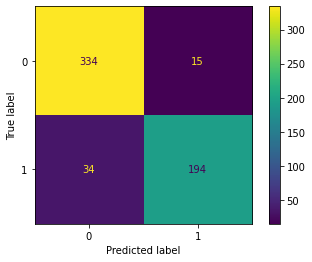

In [135]:
print(confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(stack_model, X_train_scaled, y_train, values_format='d')
plt.show()

#### Confusion matrix for the test set

[[132  24]
 [ 23  69]]


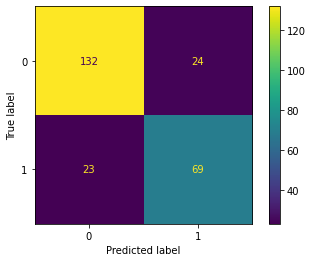

In [136]:
print(confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(stack_model, X_test_scaled, y_test, values_format='d')
plt.show()